In [2]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f

cheated_0 = Events('CheatedRecoFile_0.root')

  Using cached uproot-5.5.1-py3-none-any.whl.metadata (33 kB)
  Using cached cramjam-2.9.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
Using cached uproot-5.5.1-py3-none-any.whl (362 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 10.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 23.8 MB/s eta 0:00:00
Using cached cramjam-2.9.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


In [17]:
# this feature finds the distance between vertex and closest, vertex and furthest and takes the ratio between them

def step_length_ratio(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    # finding event length, just a single length start to furthest point.
    w_length = max([w - w_vtx for w in w_hits])
    x_length = max([x - x_vtx for x in x_hits])
    event_length = np.sqrt(w_length**2 + x_length**2) - step_length

    return step_length / event_length

In [18]:
def step_arrays(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = step_length_ratio(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

e, gamma = step_arrays(cheated_0, 15)

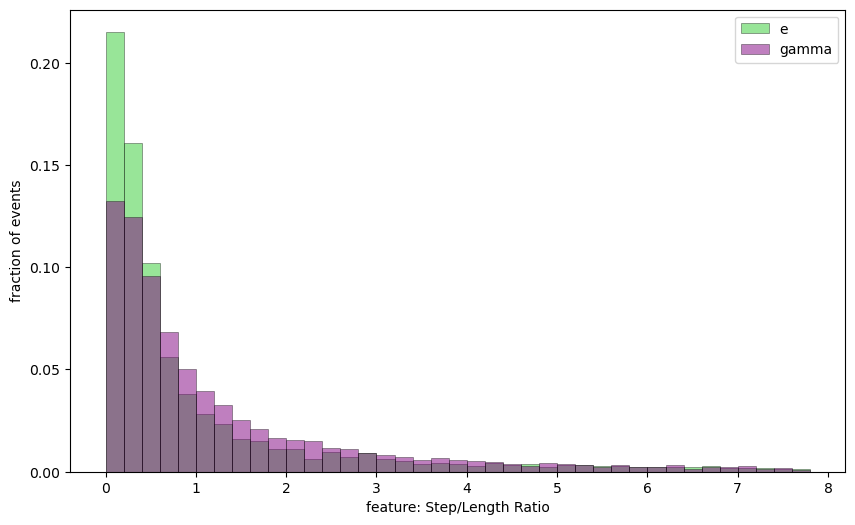

In [19]:
step_pdf = f.feature_histogram_2('Step/Length Ratio', e, gamma, np.arange(0, 8, 0.2))

In [7]:
def shower_example_idx(events, min_hits):
    n = len(events.num_final_state_particles)

    indices = []
    
    for j in range(n):
        if len(events.reco_hits_w[j]) > min_hits and not events.is_true_track[j]:
            indices.append(j)

    return indices

In [10]:
shower_1000 = shower_example_idx(cheated_0, 1000)

In [13]:
def find_closest(point, array):
    """
    Find the element in the array that is closest to the given point.
    
    Args:
        point (float or iterable): The reference point.
        array (list or numpy.ndarray): Array of elements to compare.
    
    Returns:
        closest_element: The element in the array closest to the point.
    """
    array = np.array(array)  # Ensure the input array is a numpy array
    distances = np.abs(array - point)  # Compute the absolute distances
    closest_index = np.argmin(distances)  # Index of the minimum distance
    return array[closest_index]

def find_furthest(point, array):
    array = np.array(array)  # Ensure the input array is a numpy array
    distances = np.abs(array - point)  # Compute the absolute distances
    furthest_index = np.argmax(distances)  # Index of the minimum distance
    return array[furthest_index]

In [16]:
def step_plot(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    event_start_w = find_closest(w_vtx, w_hits)
    event_start_x = find_closest(x_vtx, x_hits)
    event_end_w = find_furthest(w_vtx, w_hits)
    event_end_x = find_furthest(x_vtx, x_hits)

    if len(w_hits) == len(x_hits) and len(w_hits) > 3:
        plt.figure(figsize = (8,6))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='k', marker='x', label='Neutrino Vertex')
        plt.plot([w_vtx, event_start_w], [x_vtx, event_start_x], c='b', label='Step')
        plt.plot([event_start_w, event_end_w], [event_start_x, event_end_x], c='r', label='Length')
        plt.title(f'View for particle idx {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else: print(f'Insufficient hits to plot, less than 3 hits in idx: {event_idx}')

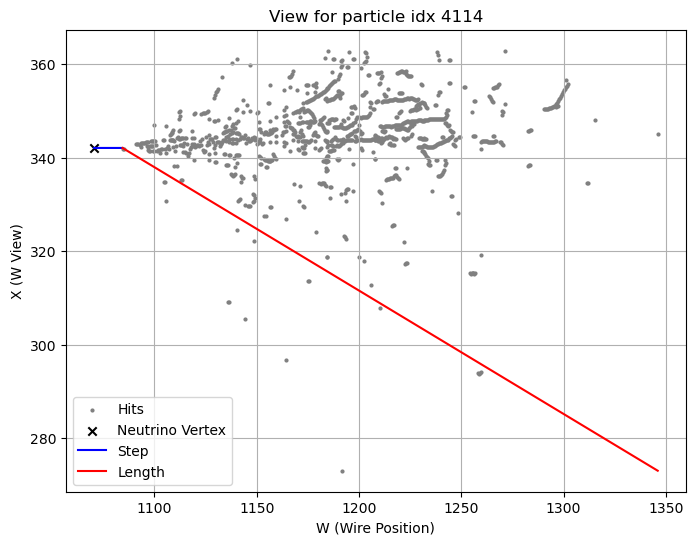

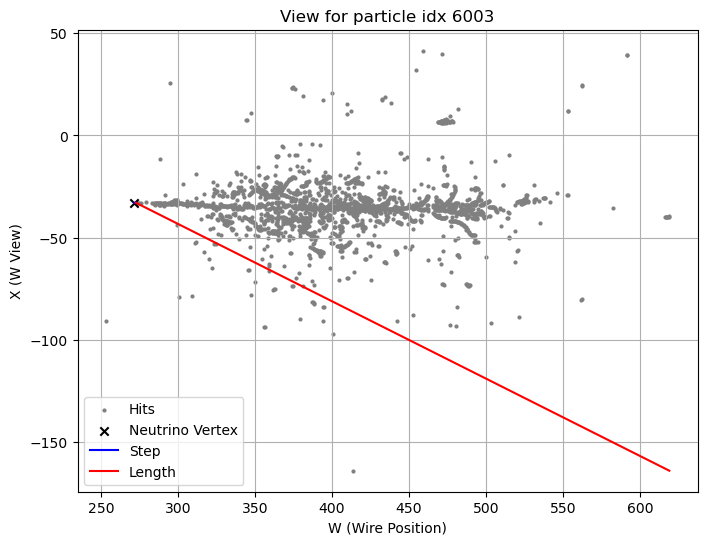

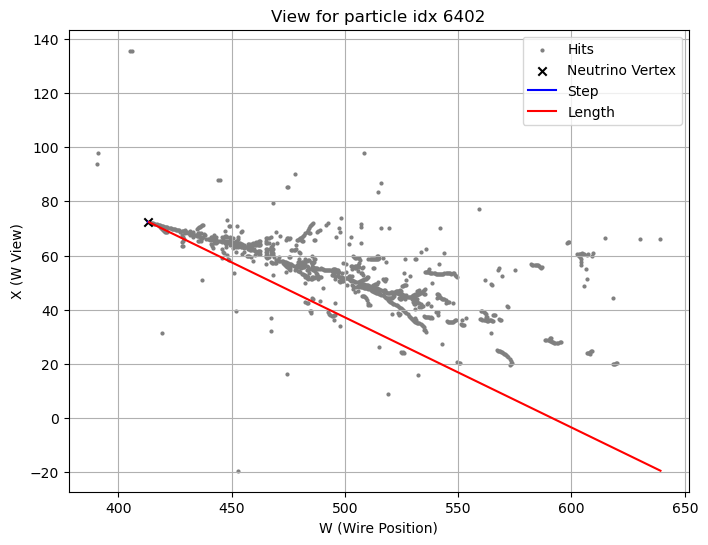

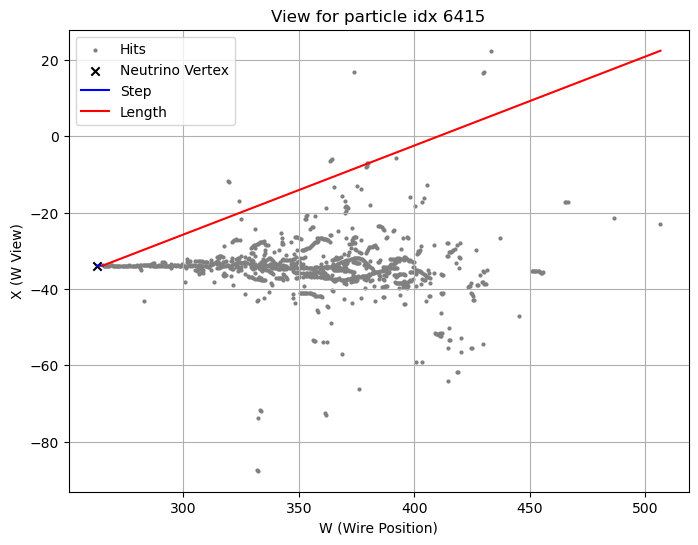

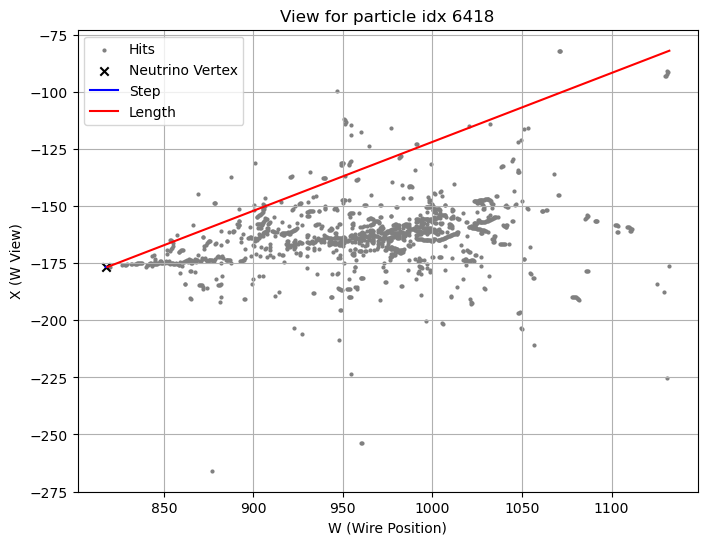

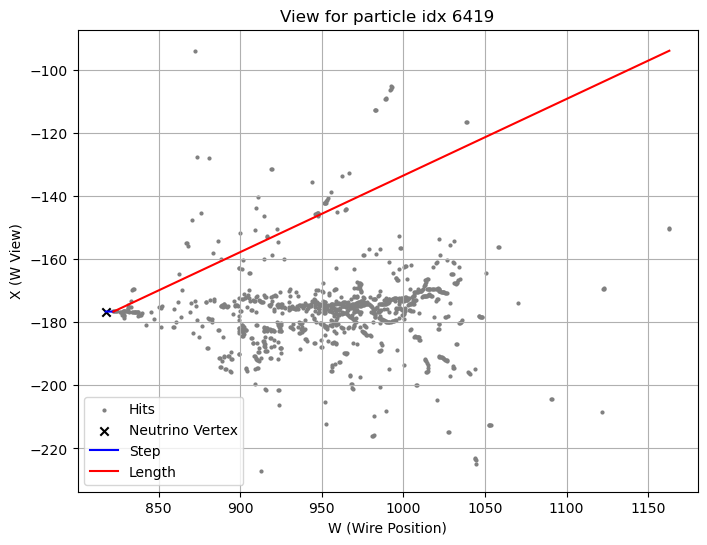

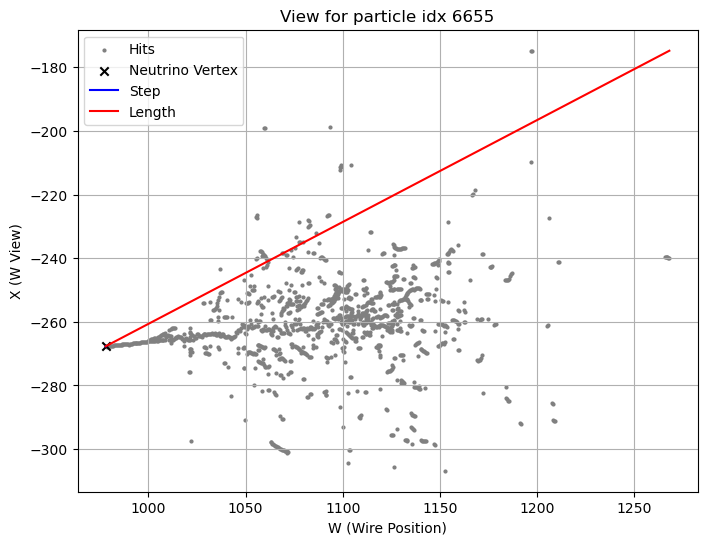

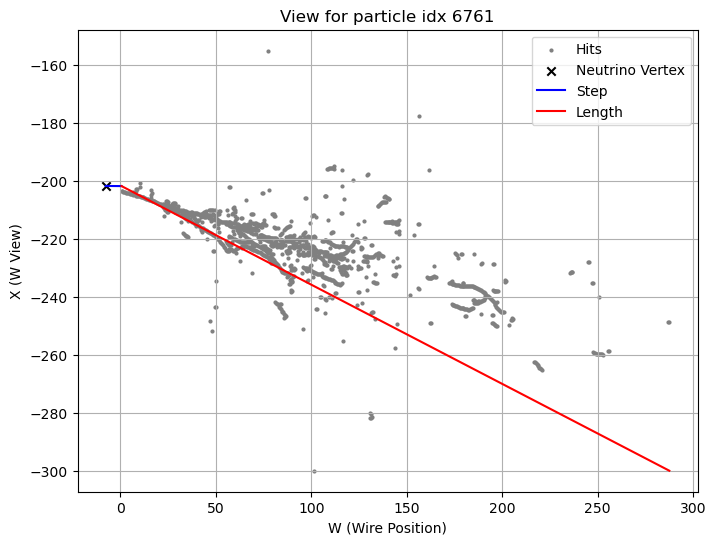

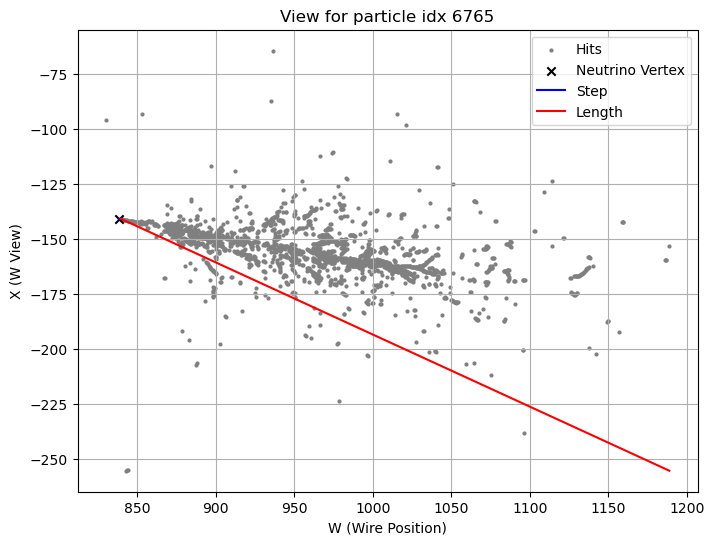

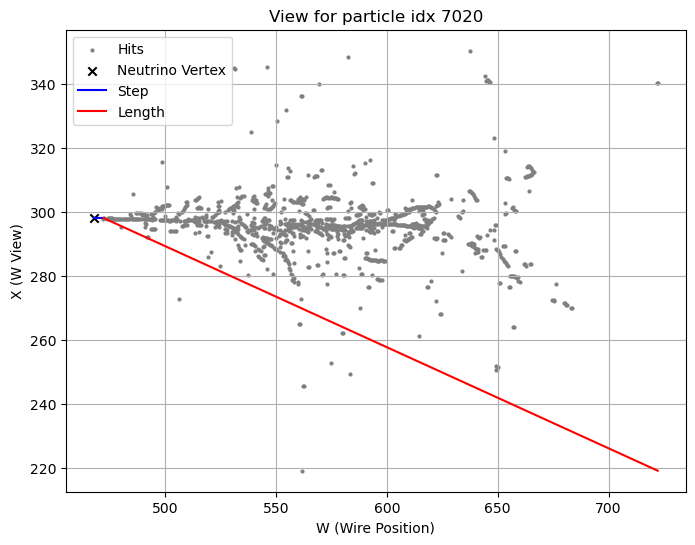

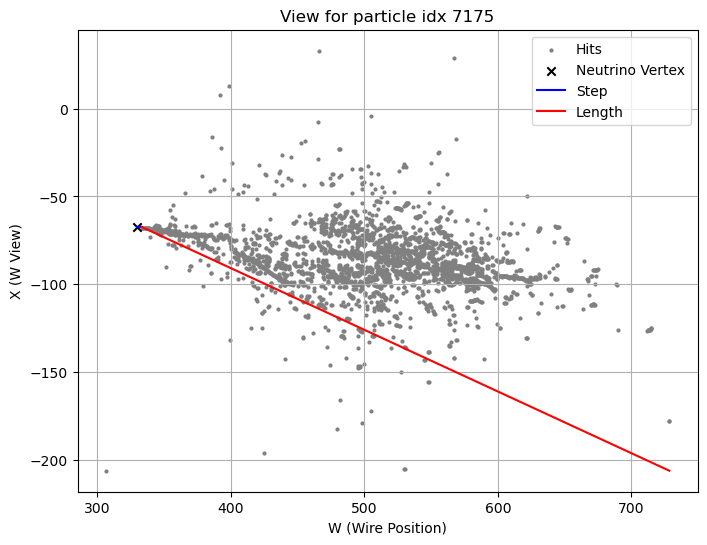

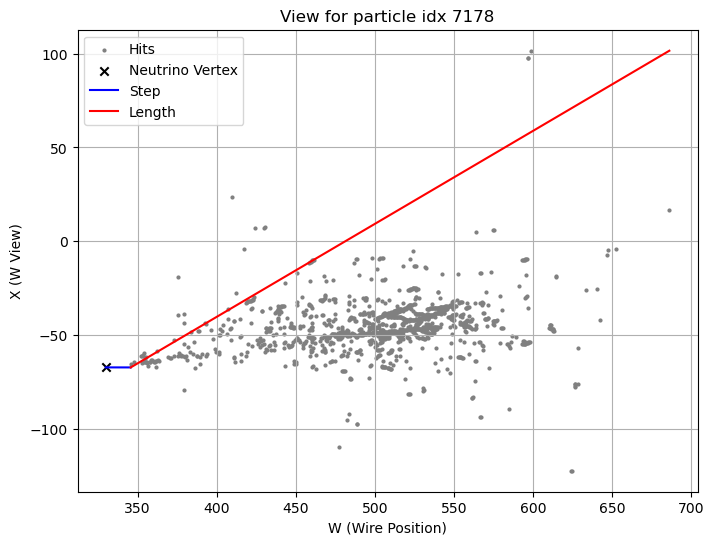

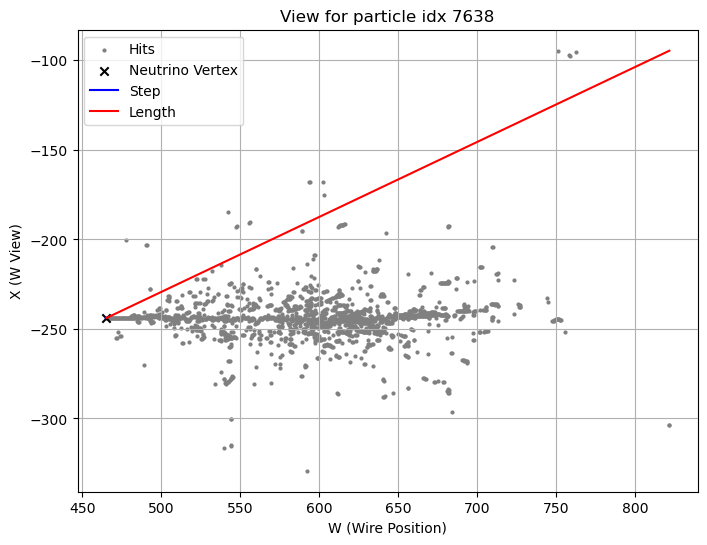

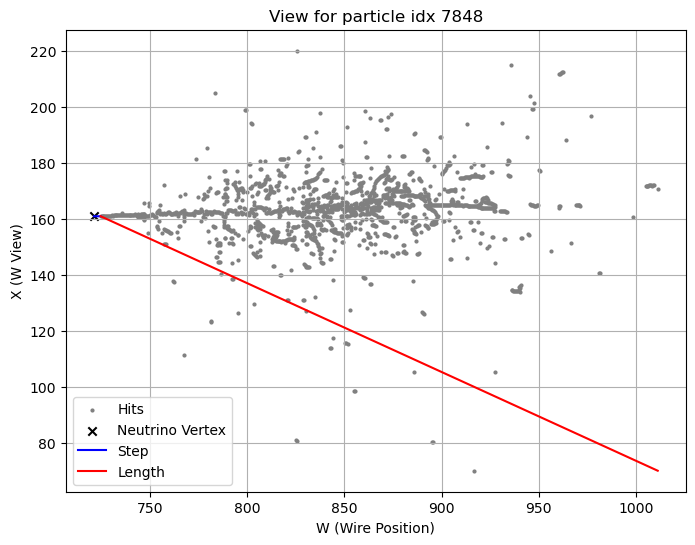

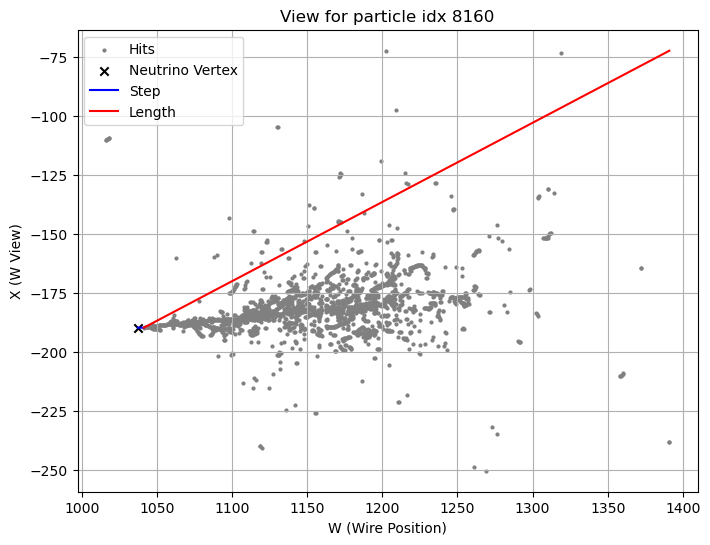

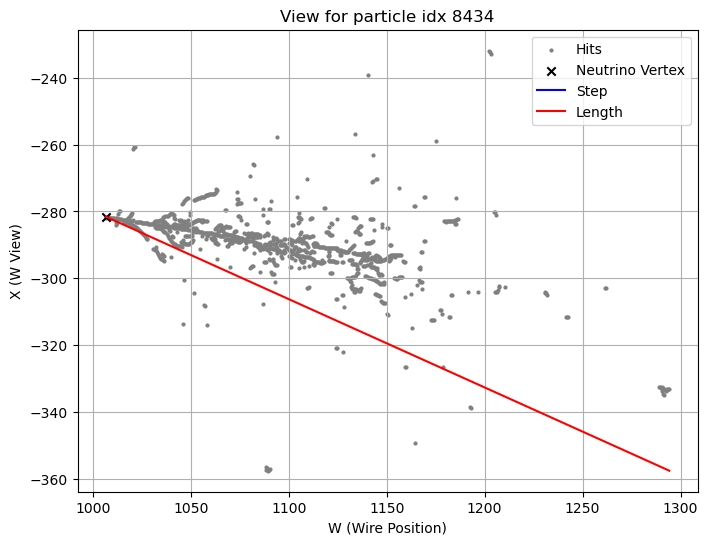

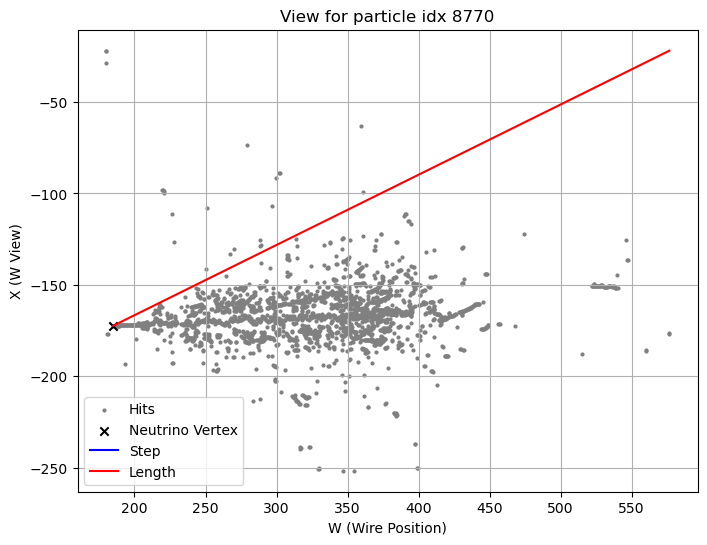

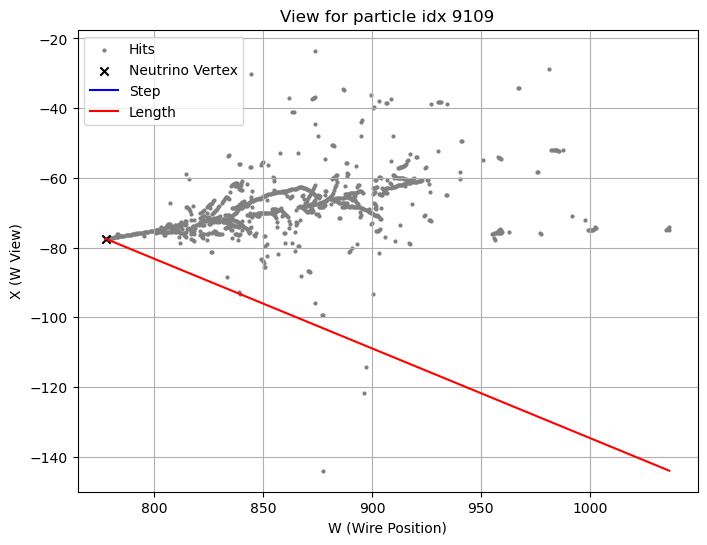

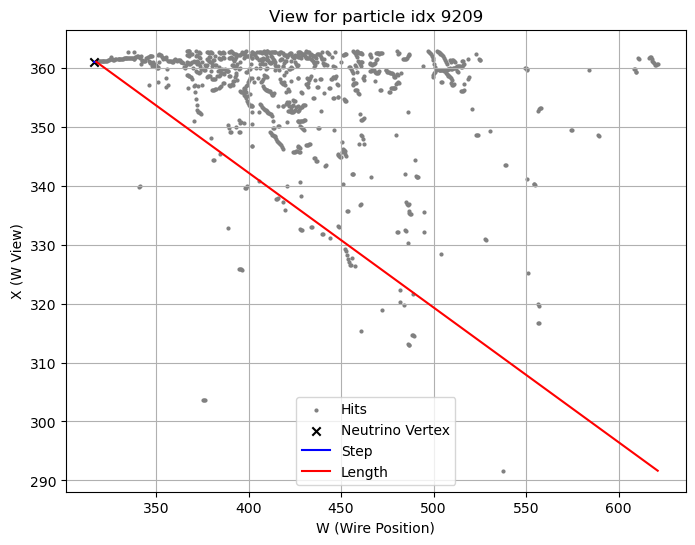

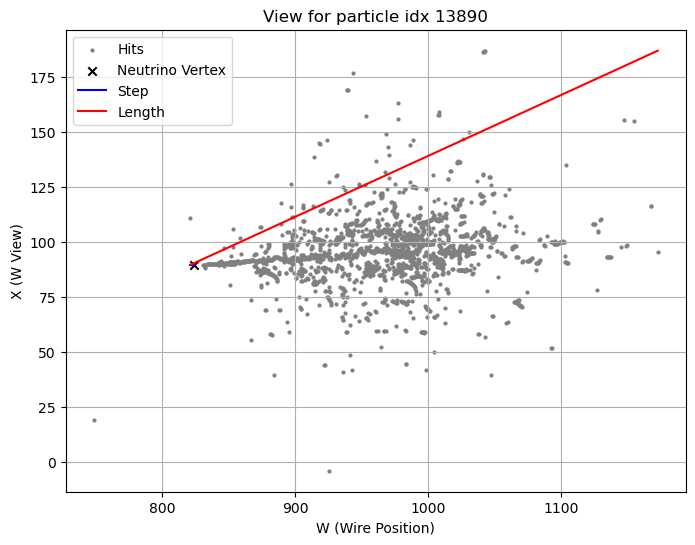

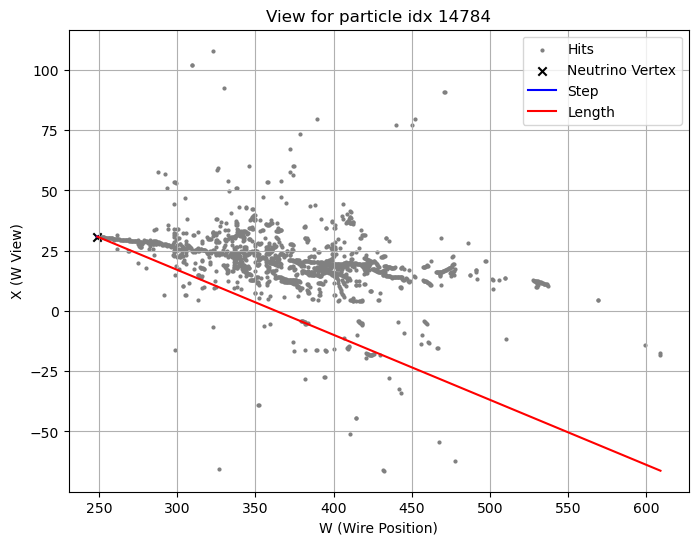

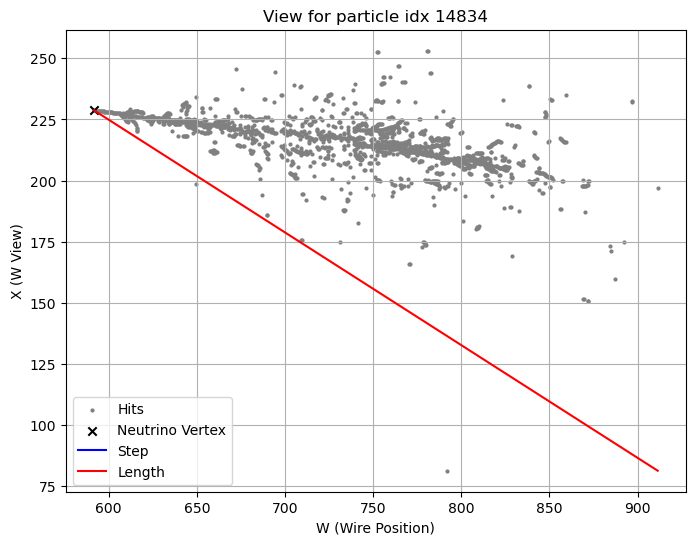

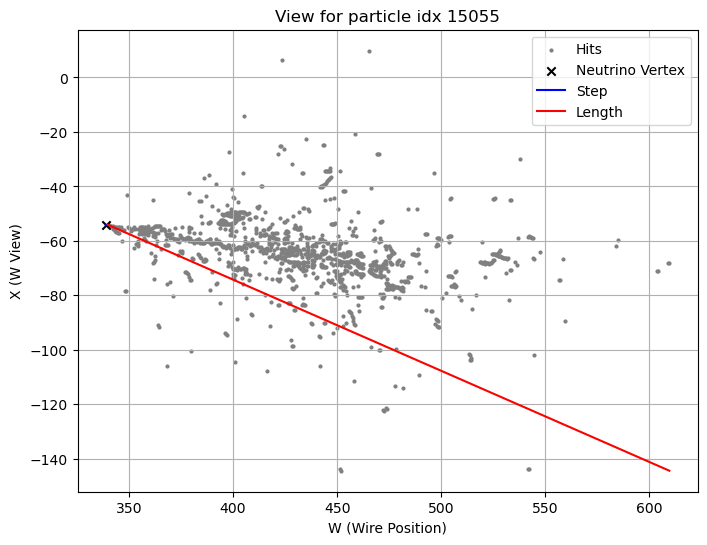

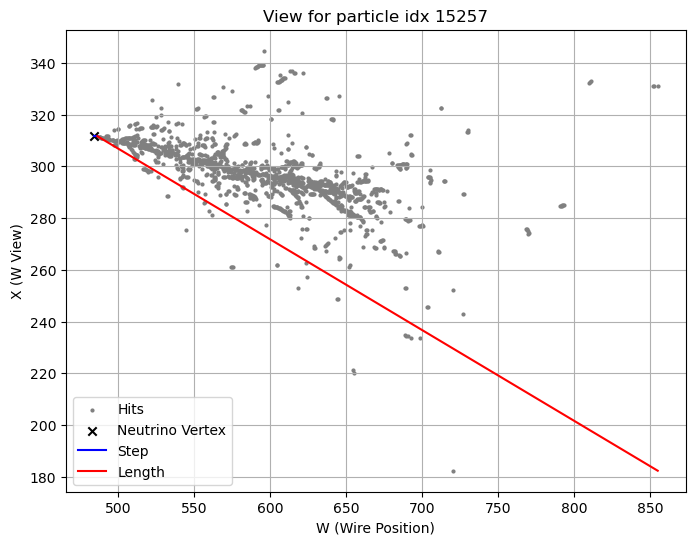

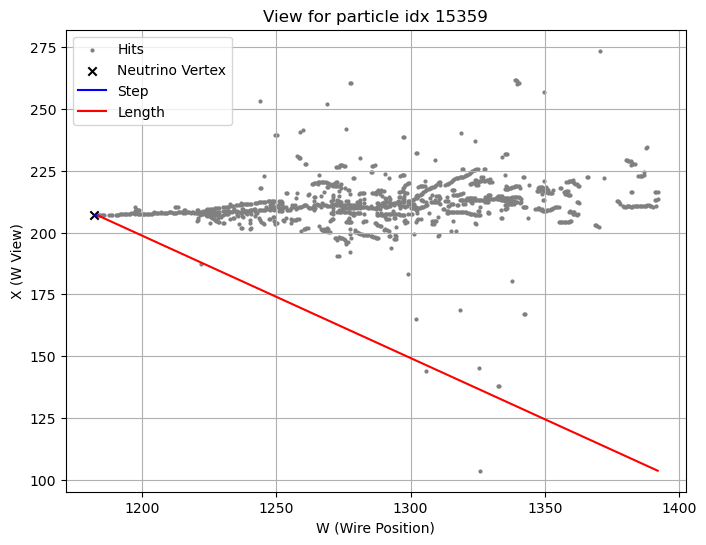

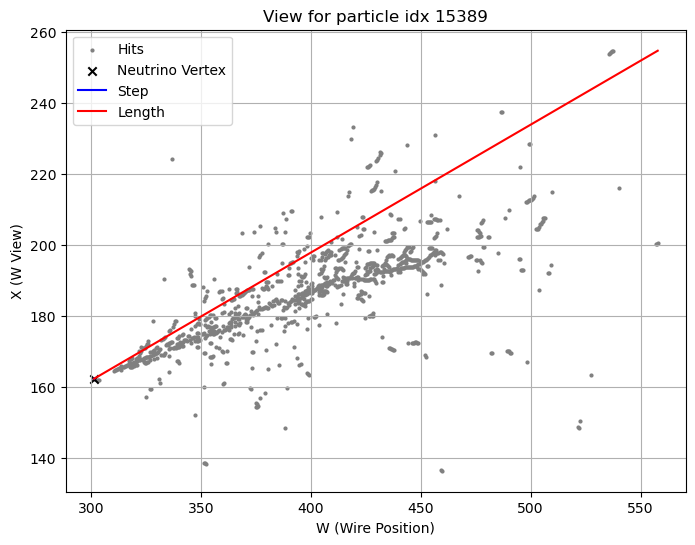

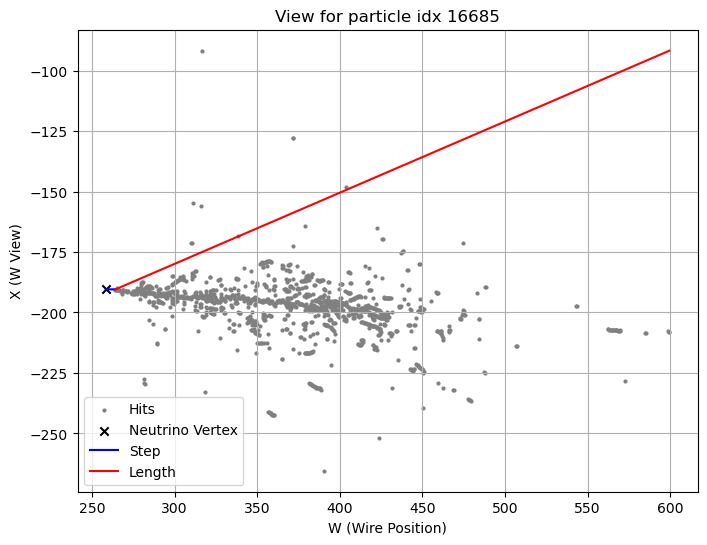

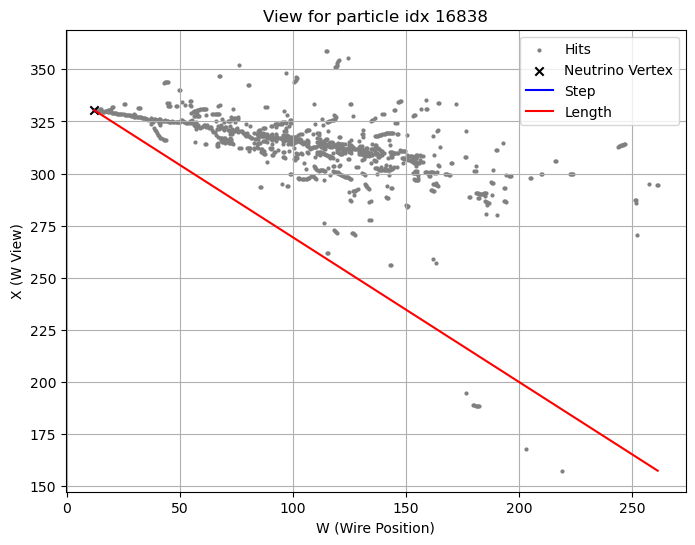

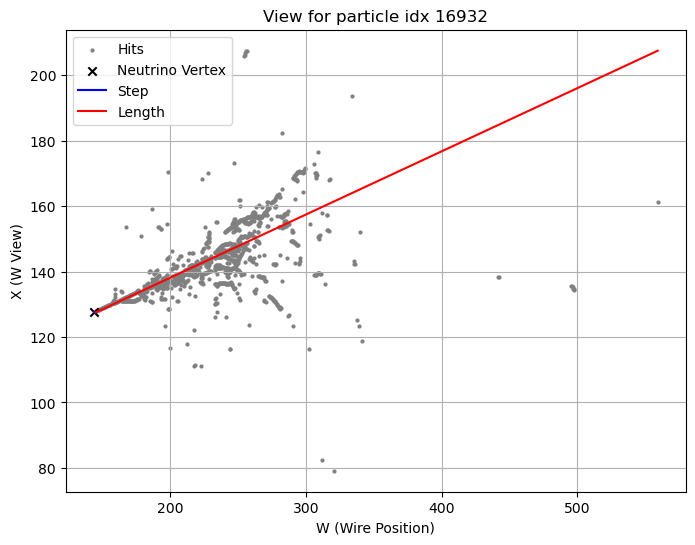

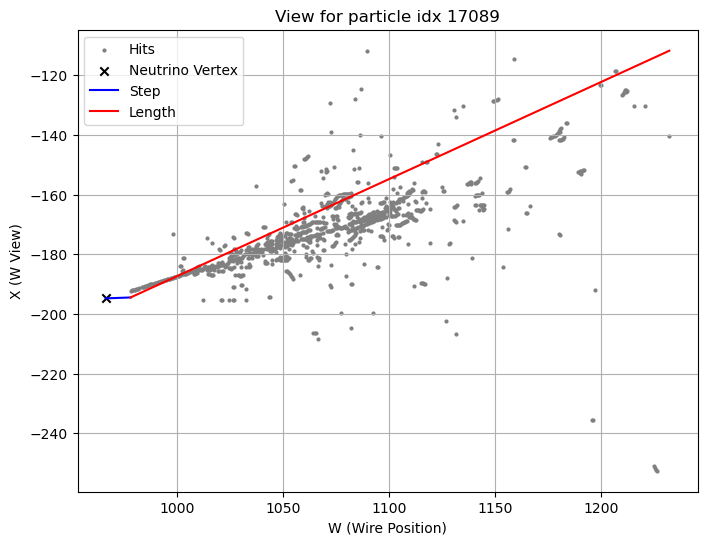

In [31]:
for a in range(30):
    step_plot(cheated_0, shower_1000[a])

In [18]:
# the length seems to be either very short or non existant, perhaps a change in methodology is suitable? Try just ploting step length...

def step_length(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    return step_length

In [25]:
def step_arrays_2(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = step_length(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

e_2, gamma_2 = step_arrays_2(cheated_0, 15)

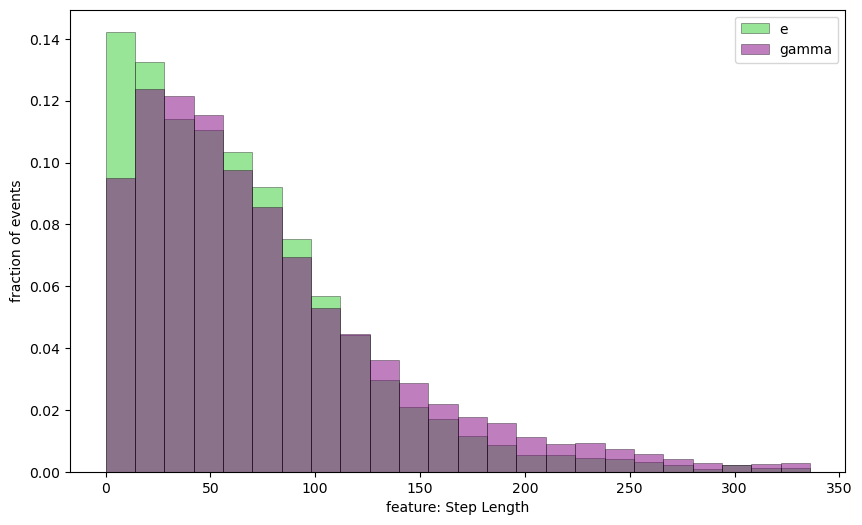

In [30]:
step_pdf = f.feature_histogram_2('Step Length', e_2, gamma_2, np.arange(0, 350, 14))

In [ ]:
# seems to be worse actually... why not try something like step length per hit? or multiplied by the number of hits??? not really sure

In [2]:
''' Distance between vtx and first hit, then first hit and second hit '''

def two_step_ratio(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    # finding distance between first and next closest point
    w_1_idx = np.argmin(np.abs(w_hits - w_vtx))
    x_1_idx = np.argmin(np.abs(x_hits - x_vtx))
    w_1 = w_hits[w_1_idx]
    x_1 = x_hits[x_1_idx]

    w_new = [w for w in w_hits if w != w_1]
    x_new = [x for x in x_hits if x != x_1]
    w_2_idx = np.argmin(np.abs(w_new - w_1))
    x_2_idx = np.argmin(np.abs(x_new - x_1))
    w_2 = w_new[w_2_idx]
    x_2 = x_new[x_2_idx]

    w_step_2 = w_2 - w_1
    x_step_2 = x_2 - x_1

    second_step = np.sqrt(w_step_2**2 + x_step_2**2)

    return step_length / second_step

In [3]:
def two_step_ratio_arrays(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = two_step_ratio(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

In [6]:
e_2stp, gamma_2stp = two_step_ratio_arrays(cheated_0, 15)

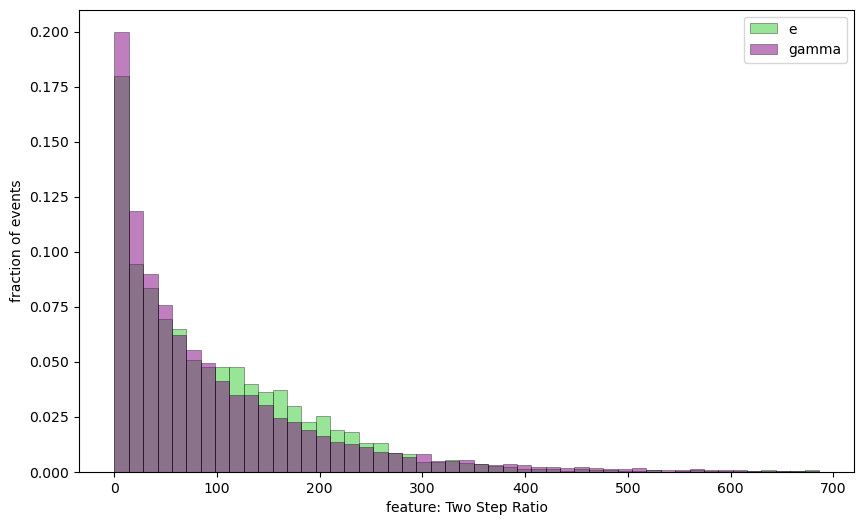

In [8]:
twostp_pdf = f.feature_histogram_2('Two Step Ratio', e_2stp, gamma_2stp, np.arange(0, 700, 14))

In [9]:
# trying length/step

def length_step_ratio(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    # finding event length, just a single length start to furthest point.
    w_length = max([w - w_vtx for w in w_hits])
    x_length = max([x - x_vtx for x in x_hits])
    event_length = np.sqrt(w_length**2 + x_length**2) - step_length

    return event_length / step_length

In [10]:
def step_arrays3(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = length_step_ratio(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

e3, gamma3 = step_arrays3(cheated_0, 15)

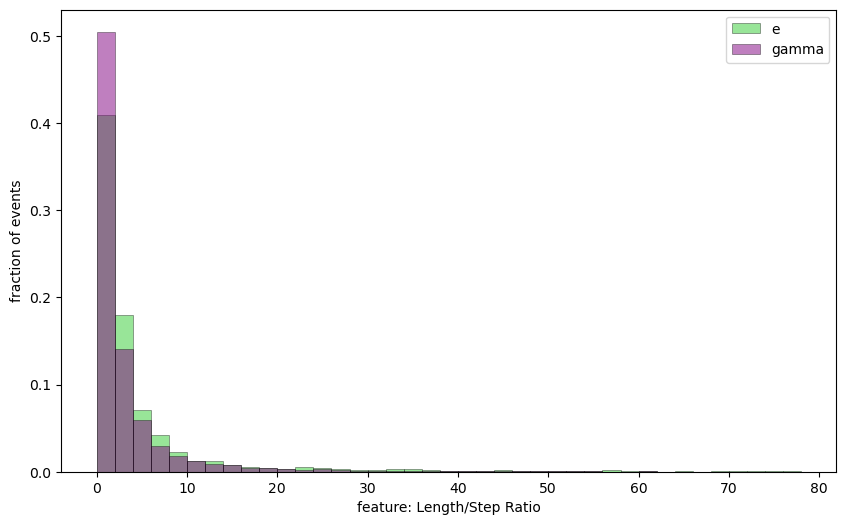

In [14]:
step_pdf3 = f.feature_histogram_2('Length/Step Ratio', e3, gamma3, np.arange(0, 80, 2))

In [20]:
# also not too great, turns out step/length is the best so far...

def step_per_hit(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    N = len(w_hits)

    return step_length / N

def step_per_hit_arrays(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = step_per_hit(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

e_hit, gamma_hit = step_per_hit_arrays(cheated_0, 15)

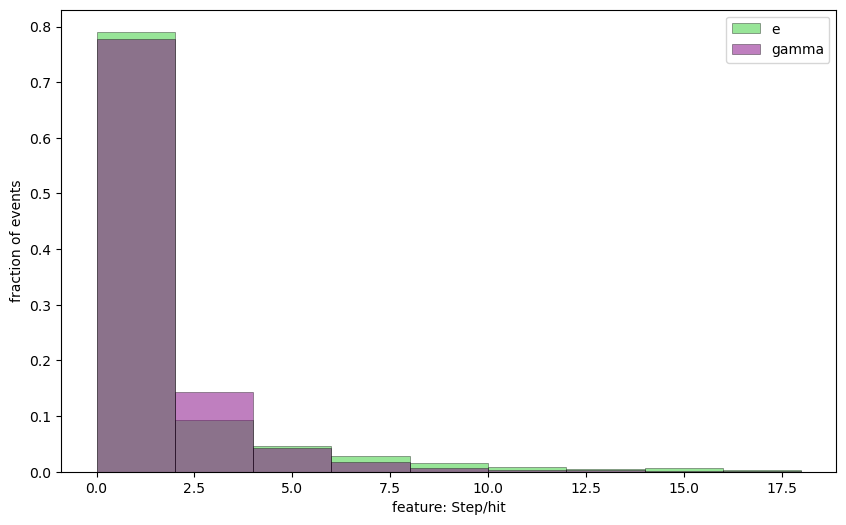

In [22]:
per_hit_pdf = f.feature_histogram_2('Step/hit', e_hit, gamma_hit, np.arange(0, 20, 2))

4.996958108828161


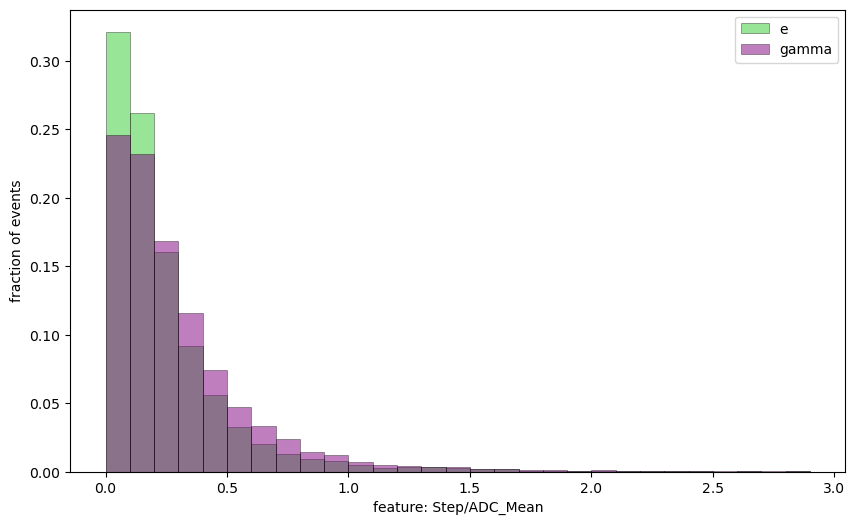

In [17]:
def adc_step(events, event_idx):
    # find all info for the feature
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]
    adcs = np.array(events.reco_adcs_w[event_idx])
    adc_avg = np.mean(adcs)

    if len(w_hits) < 3:
        print(f'Warning: Event {event_idx} has only {len(w_hits)} hits.')

    if events.is_true_track[event_idx]:
        print('Warning: Event is a true track')

    # finding step length
    w_step = min([w - w_vtx for w in w_hits])
    x_step = min([x - x_vtx for x in x_hits])
    step_length = np.sqrt(w_step**2 + x_step**2)

    return step_length / adc_avg

def adc_step_arrays(events, hits_cutoff):
    n = len(events.num_final_state_particles)

    e_step = []
    gamma_step = []
    total_showers = 0

    for i in range(n):
        if len(events.reco_hits_w[i]) > hits_cutoff and not events.is_true_track[i]:
            step = adc_step(events, i)
            total_showers += 1

            if events.mc_pdg[i] == 22:
                gamma_step.append(step)
            elif events.mc_pdg[i] in [-11, 11]:
                e_step.append(step)

    return e_step, gamma_step

e_adcstp, gamma_adcstp = adc_step_arrays(cheated_0, 15)

print(max(gamma_adcstp))
adcstp_pdf = f.feature_histogram_2('Step/ADC_Mean', e_adcstp, gamma_adcstp, np.arange(0, 3, 0.1))

In [24]:
step_length_arr = []
adc_step_arr = []

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15 and not cheated_0.is_true_track[i]:
        sl = step_length(cheated_0, i)
        adcstp = adc_step(cheated_0, i)
        
        step_length_arr.append(sl)
        adc_step_arr.append(adcstp)

correlation_matrix = np.corrcoef(step_length_arr, adc_step_arr)

# Extract the correlation coefficient
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.9172329352500409
